**Complete the details below:**

### Name: Ryno Swart


#### Student Number: 18603637

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from utils import plot_confusion_matrix

### Generate training data

In [3]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

#### Display the data that you generated to find something like the following:

**Marks: 1**

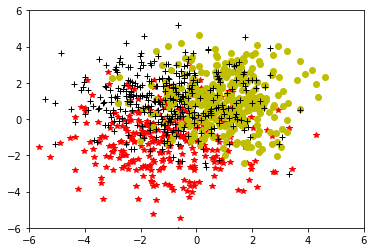

In [4]:
# Plot the data
col = ['yo','k+','r*']
for cl in [0, 1, 2]:
    cl_labels = np.array([y==cl]).flatten()
    plt.plot(X[0,cl_labels],X[1,cl_labels],col[int(cl-1)])
plt.axis([-6, 6, -6, 6])
plt.show()

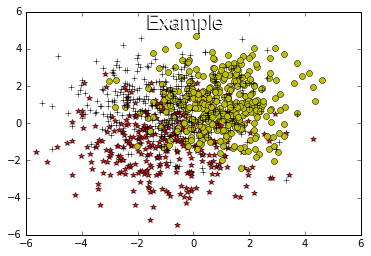

In [5]:
display(Image(filename='./images/wm_dat1.png'))

## Fit the training data to the scikit-learn logistic regression classifier

The image above shows that there is considerable overlap between the classes. Use your trained classifier to assign all the training data to different classes.

**Print the confusion matrix and also plot it, to get something like the image below:**

**Marks: 1**

In [6]:
#method copied from provided 'Classification.ipynb'
def plot_confusion_matrix(cm, title='Confusion matrix', target_names = np.array(['setosa', 'versicolor', 'virginica']), cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

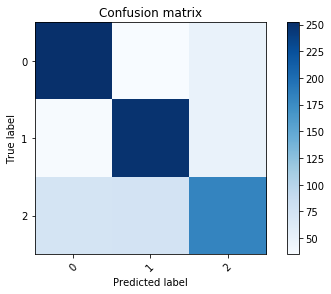

In [7]:
classi = logis()
classi.fit(X.T,y)
predicted_labels = classi.predict(X.T)
conf = confusion_matrix(y,predicted_labels)
plot_confusion_matrix(conf,target_names=np.array(['0','1','2'],dtype='<U10'))

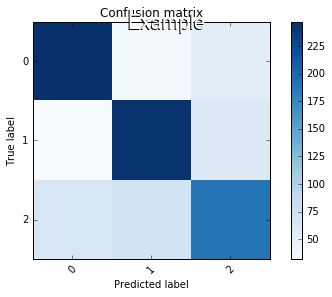

In [8]:
display(Image(filename='./images/wm_confusion.png'))

### Now plot the different classes as predicted by your system. You should get something like: 

**Can you tell from the graph that this is a *linear* classifier?**
Yes, since the classes in the graph below are separated by straight lines.

**Marks: 1 **

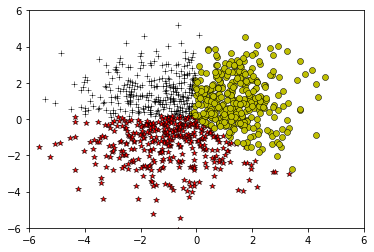

In [9]:
col = ['yo','k+','r*']
for cl in [0, 1, 2]:
    cl_labels = np.array([predicted_labels==cl]).flatten()
    plt.plot(X[0,cl_labels],X[1,cl_labels],col[int(cl-1)],markeredgecolor='black',markeredgewidth=0.5)
plt.axis([-6, 6, -6, 6])
plt.show()

Yes, because the classes are seperated by straight lines.

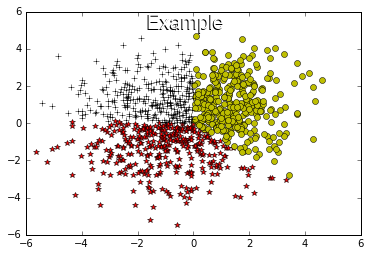

In [10]:
display(Image(filename='./images/wm_dat2.png'))

** Before continuing in the notebook, you will need to install the `lasagne` Python module with "pip3 install --user lasagne" **

# Now classify the MNIST digits

The MNIST database provided in the assignment resources consists of low-resolution (28x28) grayscale images of handwritten digits ($0,1,2,3,4,5,6,7,8,9$). First, you read in a set of training digits and display them interactively to get an idea what they look like. Afterwards, you build and train a softmax classifier using scitkit image. You will then classify the digits in the test set and display the results. Finally, you will display the weights as images.

First load the dataset - for more information about the dataset, see http://yann.lecun.com/exdb/mnist/.

In [11]:
from mnist import load_dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

# Display the test digits interactively.

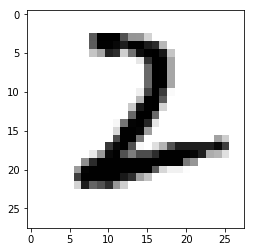

In [12]:
from ipywidgets import interact
def show_digits(k=0):
    """
    Show the first 1000 digits in the training set
    """
    
    plt.imshow(X_train[k][0], cmap=cm.binary)   
    
    plt.show()
    
w = interact(show_digits, k =(0, 1000)) 


# Train the softmax classifier

**Using the training set, build a softmax classifier. Use this classifier to classify the digits in the training set and the test set separately. Print the confusion matrix and also display it as an image for each case to get something like:**

**Marks: 2**

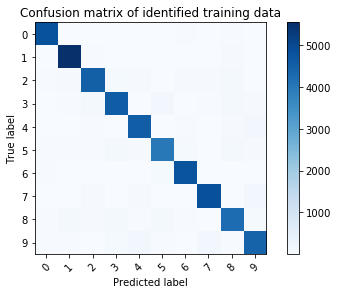

In [16]:
classi = logis()
X_train_n = np.reshape(X_train, (np.shape(X_train)[0], -1)) #flatten the image
classi.fit(X_train_n, y_train)
predicted_labels1 = classi.predict(X_train_n)
conf = confusion_matrix(y_train, predicted_labels1)
plot_confusion_matrix(conf,target_names=np.arange(10))
plt.title('Confusion matrix of training data')
plt.show()

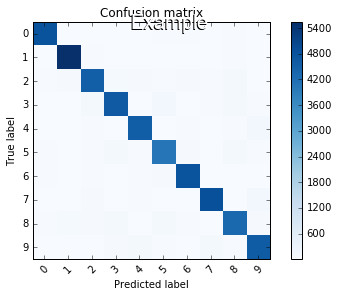

In [17]:
display(Image(filename='./images/wm_confusion2.png'))

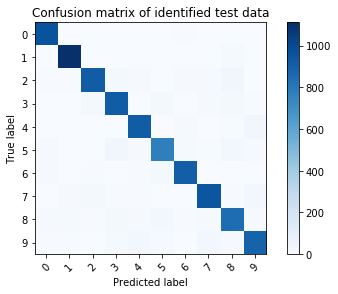

In [19]:
X_test_n = np.reshape(X_test, (np.shape(X_test)[0], -1)) #flatten the image
predicted_labels2 = classi.predict(X_test_n)
conf = confusion_matrix(y_test, predicted_labels2)
plot_confusion_matrix(conf,target_names=np.arange(10))
plt.title('Confusion matrix of test data')
plt.show()

### Accuracy

**Calculate the accuracy of your system as a fraction of the correctly classified digits. You should get something like 0.9254.**

**Marks: 1**

In [23]:
correct_train = y_train==predicted_labels1
correct_test = y_test==predicted_labels2
print('Accuracy for training data: ' + str(np.count_nonzero(correct_train)/np.size(correct_train)))
print('Accuracy for test data: ' + str(np.count_nonzero(correct_test)/np.size(correct_test)))

Accuracy for training data: 0.92734
Accuracy for test data: 0.9199


# Extracting the weights and display as images.

**Extract the weights of the softmax classifier and display them as images. Each set of weights should correspond to a specific digit. You should get something like:**

**Marks: 2**

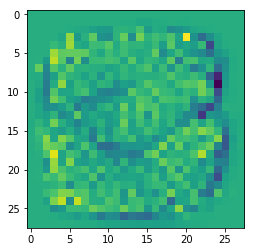

In [24]:
weights = np.reshape(classi.coef_, (10, 28, 28))

def show_my_weights(k=0):
    print('Weights (as image) for digit ' + str(k))
    plt.imshow(weights[k], cmap=cm.viridis)
    plt.show()

w = interact(show_my_weights, k =(0, 9)) 

In [ ]:
show_my_weights(4)

In [ ]:
show_my_weights(7)

In [25]:
from skimage import io
ic = io.ImageCollection('./wm_softmax_mnist_weights/*.png')
def show_weights(k=0):
    plt.imshow(ic[k], cmap=cm.viridis)
    plt.show()

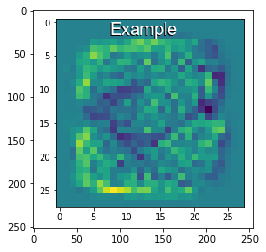

In [26]:
w = interact(show_weights, k =(0, 9))

As a comparison, here you can see what the weights look like if you train the softmax classifier using tensorflow (a library dedicated to neural networks and deep learning).

In [27]:
ic_tensor = io.ImageCollection('./wm_tensor_mnist_weights/*.png')
def show_weights_tensor(k=0):
    plt.imshow(ic_tensor[k], cmap=cm.viridis)
    plt.show()

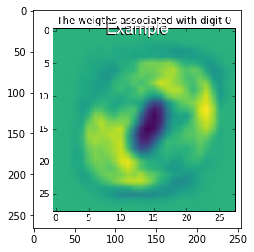

In [28]:
w = interact(show_weights_tensor, k =(0, 9)) 

## Further investigation

**Fit the logistic regression classifier for different values of the regularization parameter - we recommend values evenly spaced on the log scale - and show the corresponding weight images for some digit as the parameter changes.  Explain the changes in the weight images observed.**

The classifiers with higher regularization parameters have smaller weight values on average.  Lower regularization classifier weights change more rapidly and could be considered to be overfitted to the training data.  Higher regularization parameters cause the classifier to 'doubt' the training data and fit a more general, simple model.

**Marks: 2**

In [36]:
regu = 0.01
X_train_n = np.reshape(X_train, (np.shape(X_train)[0], -1)) #flatten the image
print('huh?')

def show_regularization(regularization = 1):
    classi = logis(C=1/regularization)
    classi.fit(X_train_n,y_train)
    # Show the 0 (Zero) digit weights
    plt.imshow(np.reshape(classi.coef_, (10, 28, 28))[0], cmap=cm.viridis)
    plt.title('Weight image for Zero digit with Regularization strength = ' + str(regularization))
    plt.show()

huh?


[-0.58346888  0.86257046  1.05915982 -0.09237585 -1.50060176]


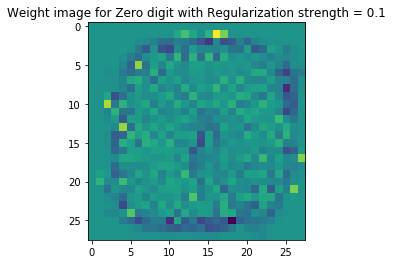

In [37]:
show_regularization(regu*10**1)

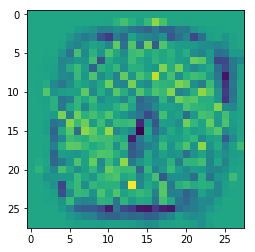

In [31]:
show_regularization(regu*10**2)

[-0.11373743 -0.05784649  0.01046444 -0.10637952 -0.365189  ]


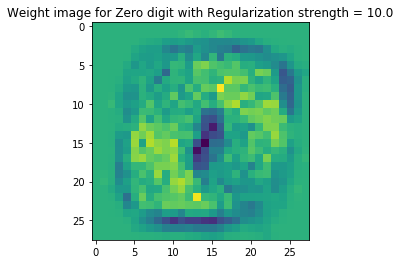

In [39]:
show_regularization(regu*10**3)

[-0.03457796 -0.05015264 -0.07142793 -0.11986418 -0.16109097]


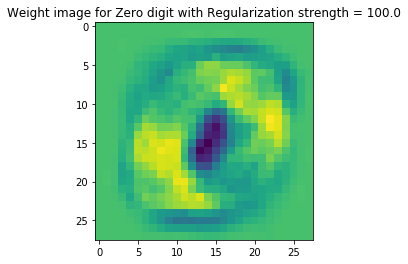

In [38]:
show_regularization(regu*10**4)

# Plagiarism declaration

** Add the plagiarism declaration from the University's Plagiarism Policy in this cell.**

### Plagiarism Declaration

- I have read and understand the Stellenbosch University Policy on Plagiarism and the definitions of
plagiarism and self-plagiarism contained in the Policy [Plagiarism: The use of the ideas or material
of others without acknowledgement, or the re-use of one’s own previously evaluated or published
material without acknowledgement or indication thereof (self-plagiarism or text-recycling)].
- I also understand that direct translations are plagiarism.
- Accordingly all quotations and contributions from any source whatsoever (including the internet)
have been cited fully. I understand that the reproduction of text without quotation marks (even
when the source is cited) is plagiarism.
- I declare that the work contained in this assignment is my own work and that I have not previously
(in its entirety or in part) submitted it for grading in this module/assignment or another
module/assignment.